In [18]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [19]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [21]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [22]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
__________

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=3)
history1=model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[earlyStop])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 50s 913us/sample - loss: 0.1823 - acc: 0.9308 - val_loss: 0.1945 - val_acc: 0.9284
Epoch 2/10
55000/55000 [==============================] - 51s 930us/sample - loss: 0.1806 - acc: 0.9317 - val_loss: 0.1957 - val_acc: 0.9324
Epoch 3/10
55000/55000 [==============================] - 51s 934us/sample - loss: 0.1826 - acc: 0.9315 - val_loss: 0.2330 - val_acc: 0.9160
Epoch 4/10
55000/55000 [==============================] - 50s 917us/sample - loss: 0.1822 - acc: 0.9306 - val_loss: 0.1921 - val_acc: 0.9322
Epoch 5/10
55000/55000 [==============================] - 49s 895us/sample - loss: 0.1787 - acc: 0.9337 - val_loss: 0.1948 - val_acc: 0.9286
Epoch 6/10
55000/55000 [==============================] - 52s 953us/sample - loss: 0.1812 - acc: 0.9320 - val_loss: 0.1956 - val_acc: 0.9298
Epoch 7/10
55000/55000 [==============================] - 52s 953us/sample - loss: 0.1806 - acc: 0.9320 -

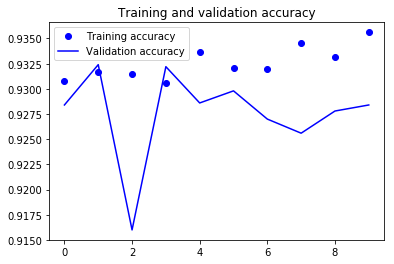

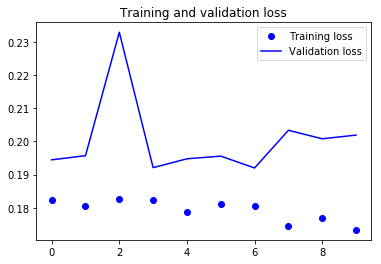

In [57]:
accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [45]:
score_es = model.evaluate(x_valid, y_valid, verbose=0)

In [46]:
#print validation loss and accuracy
print('Val loss:', score_es[0])
print('val accuracy:', score_es[1])

Val loss: 0.21135022148489951
val accuracy: 0.918


In [47]:
#Evaluation on test data
score_es1 = model.evaluate(x_test, y_test, verbose=0)

In [48]:
print('Test loss:', score_es1[0])
print('Test accuracy:', score_es1[1])

Test loss: 0.23123160474300383
Test accuracy: 0.9193


In [ ]:
**********************************Using ReduceROnPlateau*****************************************************

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [49]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')
history=model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[reduce_lr])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 52s 947us/sample - loss: 0.2002 - acc: 0.9243 - val_loss: 0.1929 - val_acc: 0.9292
Epoch 2/10
55000/55000 [==============================] - 51s 932us/sample - loss: 0.1981 - acc: 0.9263 - val_loss: 0.2001 - val_acc: 0.9268
Epoch 3/10
55000/55000 [==============================] - 47s 858us/sample - loss: 0.1959 - acc: 0.9256 - val_loss: 0.1954 - val_acc: 0.9300
Epoch 4/10
55000/55000 [==============================] - 49s 883us/sample - loss: 0.1946 - acc: 0.9280 - val_loss: 0.1945 - val_acc: 0.9268
Epoch 5/10
55000/55000 [==============================] - 49s 883us/sample - loss: 0.1926 - acc: 0.9285 - val_loss: 0.2001 - val_acc: 0.9278
Epoch 6/10
55000/55000 [==============================] - 48s 866us/sample - loss: 0.1898 - acc: 0.9281 - val_loss: 0.1944 - val_acc: 0.9300
Epoch 7/10
55000/55000 [==============================] - 48s 867us/sample - loss: 0.1860 - acc: 0.9297 -

In [50]:
score = model.evaluate(x_valid, y_valid, verbose=0)

In [51]:
#print loss and accuracy
print('Val loss:', score[0])
print('val accuracy:', score[1])

Val loss: 0.19998053964599968
val accuracy: 0.9306


In [52]:
#Evaluation on test data
score1 = model.evaluate(x_test, y_test, verbose=0)

In [53]:
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.22551829048395156
Test accuracy: 0.9254


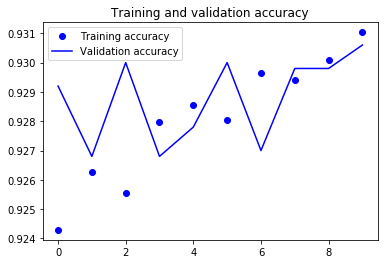

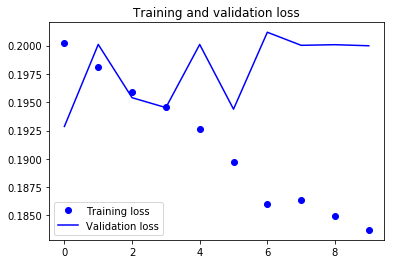

In [55]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
